In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from sklearn import metrics
import pygraphviz as pgv
from IPython.display import Image

# 문제 1

Data import

In [2]:
data1 = pd.read_csv('./data/scoredEx.csv')
data1.head()

,Unnamed: 0,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x22,x23,x24,x25,x26,x27,x28,x29,y_test,p_pred
0,0,-0.206561,0.286311,-0.137124,-0.279260,1.013376,0.806556,0.699320,0.846065,1.111279,...,0.179870,-0.063607,1.097274,0.835474,1.143785,1.377912,1.106957,1.493688,0,0.133333
1,1,-0.260524,1.387014,-0.324127,-0.332729,-0.601368,-0.990992,-0.766849,-0.728400,-0.703240,...,-0.475716,-0.435405,-0.152049,-0.941264,-0.638975,-0.830706,-0.738931,-0.890300,1,1.000000
2,2,-0.030472,-0.844644,-0.097993,-0.137624,-1.188483,-0.919734,-0.852851,-0.577763,-0.812768,...,-0.319638,-0.336962,-1.269864,-0.970527,-1.005506,-0.494046,-1.237207,-0.933525,1,0.950000
3,3,0.037691,-0.260550,-0.030853,-0.061970,-2.177683,-0.988149,-0.804137,-0.907410,-0.644825,...,-0.043523,-0.107027,-1.662195,-0.238966,-0.555018,-0.598500,-0.428317,-0.398208,1,0.950000
4,4,-0.311646,-0.202373,-0.385500,-0.372831,-0.464730,-1.263703,-0.793214,-0.507861,-1.258183,...,-0.679153,-0.588344,-1.549975,-1.323648,-1.073966,-0.981753,-1.478256,-1.233324,1,1.000000


In [3]:
data1.columns

Index(['Unnamed: 0', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8',
       'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18',
       'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28',
       'x29', 'y_test', 'p_pred'],
      dtype='object')

In [4]:
data1.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
data1.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x22,x23,x24,x25,x26,x27,x28,x29,y_test,p_pred
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,...,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,-0.025967,-0.012539,-0.027478,-0.027426,-0.017353,-0.040287,-0.038836,-0.041152,-0.007950,0.005338,...,-0.036854,-0.037154,-0.010314,-0.038565,-0.031195,-0.037757,-0.006262,-0.013833,0.634085,0.657185
std,0.979966,1.030840,0.980663,0.958528,1.001514,0.987738,0.988012,0.975117,0.983680,0.997802,...,0.956183,0.922684,0.984116,0.975208,1.011560,0.986571,0.971238,0.952780,0.482290,0.423610
min,-2.029648,-2.229249,-1.984504,-1.454443,-2.177683,-1.368694,-1.114873,-1.261820,-2.744117,-1.780172,...,-1.693361,-1.222423,-2.116335,-1.323648,-1.305831,-1.745063,-2.160960,-1.601839,0.000000,0.000000
25%,-0.686545,-0.753888,-0.694839,-0.666200,-0.799208,-0.816259,-0.777584,-0.754323,-0.668556,-0.728310,...,-0.690025,-0.643366,-0.691230,-0.734519,-0.802331,-0.784874,-0.635393,-0.667806,0.000000,0.133333
50%,-0.252003,-0.125580,-0.258635,-0.322206,-0.105345,-0.302863,-0.426233,-0.448793,-0.071627,-0.212302,...,-0.317851,-0.361925,-0.055610,-0.284132,-0.297391,-0.255445,-0.120938,-0.249694,1.000000,0.950000
75%,0.513415,0.581849,0.503796,0.386687,0.614849,0.493857,0.475214,0.506100,0.534430,0.506423,...,0.517940,0.279362,0.597545,0.505953,0.514830,0.711749,0.477640,0.436631,1.000000,1.000000
max,3.971288,4.651889,3.976130,5.244841,4.770911,4.568425,4.243589,3.927930,3.995524,4.671344,...,3.104840,3.627307,3.771263,4.348873,4.700669,2.685877,4.648279,3.361201,1.000000,1.000000


In [6]:
data1['y_test']
data1['p_pred']

0      0
1      1
2      1
3      1
4      1
      ..
394    0
395    0
396    0
397    1
398    1
Name: y_test, Length: 399, dtype: int64

0      0.133333
1      1.000000
2      0.950000
3      0.950000
4      1.000000
         ...   
394    0.350000
395    0.050000
396    0.100000
397    1.000000
398    0.950000
Name: p_pred, Length: 399, dtype: float64

### (1) Precision-Recall curve

In [7]:
possible_thereshold = np.arange(0.01, 1, 0.01)
possible_thereshold

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

Text(0.5, 1.0, 'Precision & Recall curve')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Unrecognized location 'down'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


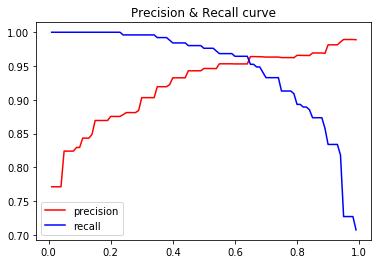

In [8]:
precision_list = []
recall_list = []
for i in range(len(possible_thereshold)):
    y_pred = data1['p_pred'] > possible_thereshold[i]
    cfmatrix = confusion_matrix(data1['y_test'], y_pred)
    precision = cfmatrix[1][1] / (cfmatrix[0][1] + cfmatrix[1][1])
    recall = cfmatrix[1][1] / (cfmatrix[1][0] + cfmatrix[1][1])
    precision_list.append(precision)
    recall_list.append(recall)

plt.title('Precision & Recall curve')
plt.plot(possible_thereshold, precision_list, color = 'red', label = 'precision')
plt.plot(possible_thereshold, recall_list, color = 'blue', label = 'recall')
plt.legend(loc='down')
plt.show()


Text(0.5, 1.0, 'Precision / Recall curve')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Unrecognized location 'down'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  This is separate from the ipykernel package so we can avoid doing imports until


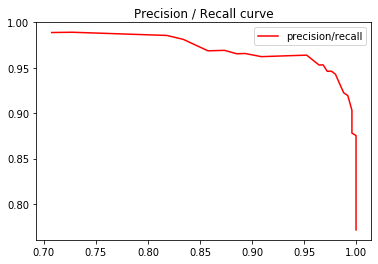

In [28]:
plt.title('Precision / Recall curve')
plt.plot(recall_list, precision_list, color = 'red', label = 'precision/recall')
plt.legend(loc='down')
plt.show()

### (2)

In [10]:
precision_np = np.array(precision_list)
recall_np = np.array(recall_list)
f1_score_1= 2 * (precision_np * recall_np)/(precision_np + recall_np)
f1_score_1

array([0.87091222, 0.87091222, 0.87091222, 0.87091222, 0.90357143,
       0.90357143, 0.90357143, 0.90357143, 0.90681004, 0.90681004,
       0.91500904, 0.91500904, 0.91500904, 0.91833031, 0.93014706,
       0.93014706, 0.93014706, 0.93014706, 0.93014706, 0.93357934,
       0.93357934, 0.93357934, 0.93357934, 0.93333333, 0.93506494,
       0.93506494, 0.93506494, 0.93506494, 0.93680297, 0.94736842,
       0.94736842, 0.94736842, 0.94736842, 0.94736842, 0.95437262,
       0.95437262, 0.95437262, 0.95437262, 0.95419847, 0.95769231,
       0.95769231, 0.95769231, 0.95769231, 0.95769231, 0.96124031,
       0.96124031, 0.96124031, 0.96124031, 0.96124031, 0.96108949,
       0.96108949, 0.96108949, 0.96108949, 0.95906433, 0.96078431,
       0.96078431, 0.96078431, 0.96078431, 0.96078431, 0.95874263,
       0.95874263, 0.95874263, 0.95874263, 0.95874263, 0.9582505 ,
       0.9582505 , 0.9561753 , 0.9561753 , 0.952     , 0.94779116,
       0.94779116, 0.94779116, 0.94779116, 0.94779116, 0.93711

In [11]:
np.where(f1_score_1 == f1_score_1.max())

(array([44, 45, 46, 47, 48]),)

In [12]:
possible_thereshold[np.where(f1_score_1 == f1_score_1.max())]

array([0.45, 0.46, 0.47, 0.48, 0.49])

위 threshold들 (0.45, 0.46, 0.47, 0.48, 0.49)에서 f1스코어가 가장 높다!

### (3)

위 threshold중 0.47을 기준으로 분류하도록 하겠다.

In [13]:
data1['y_pred'] = data1['p_pred'] > 0.47

In [14]:
accuracy_score(data1['y_test'], data1['y_pred'])

0.949874686716792

Accuracy가 0.94987(95%)가 나온다!

# 문제2

pdf 파일 참고 바랍니다.

# 문제3

In [15]:
x = [1, 3, 3, 4, 5, 5, 6, 6, 7, 8, 9]
y = [0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1]
data3 = pd.DataFrame(np.array([x, y])).T
data3.columns = ['x', 'y']

In [16]:
data3

,x,y
0,1,0
1,3,0
2,3,1
3,4,0
4,5,0
5,5,1
6,6,0
7,6,1
8,7,1
9,8,1


In [17]:
def jini_binary(data, threshold):
    data_1 = data[data['x'] >= threshold]
    data_2 = data[data['x'] < threshold]
    jini_1 = 1 - (len(data_1[data_1['y'] == 0])/len(data_1))**2 - (len(data_1[data_1['y'] == 1])/len(data_1))**2
    jini_2 = 1 - (len(data_2[data_2['y'] == 0])/len(data_2))**2 - (len(data_2[data_2['y'] == 1])/len(data_2))**2
    return jini_1 * len(data_1)/len(data) + jini_2 * len(data_2)/len(data)

In [18]:
jini_binary(data3, 5)
jini_binary(data3, 7)

0.3961038961038961

0.3409090909090909

5로 분할했을 때의 지니계수는 0.3961, 7로 분할했을 때의 지니계수는 0.3409 이기 때문에 7로 분할하는 것이 더 좋다!

# 문제4

### Data import

In [19]:
data4 = pd.read_csv('./data/Churn_Modelling.csv')
data4.head()
data4.describe()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Female,43,2,125510.82,1,1,1,79084.10,0


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [20]:
own_values = data4[['RowNumber','CustomerId', 'Surname']]
data4.drop(['RowNumber','CustomerId', 'Surname'], axis = 1, inplace = True)
data4.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0


In [21]:
data4.Gender = data4.Gender == 'Male' # Male = 1, Female = 0

### (1) data split

In [22]:
x_train, x_valid, y_train, y_valid = train_test_split(data4.iloc[:,:-1], data4.iloc[:,-1], test_size = 0.3, random_state = 11)

### (2) CART with train data

In [23]:
f1_scores = []
for i in range(100):
    dt_clf=DecisionTreeClassifier(random_state=123, max_depth = i+1)
    dt_clf.fit(x_train, y_train)
    y_pred = dt_clf.predict(x_valid)
    f1_score = metrics.f1_score(y_valid, y_pred)
    f1_scores.append(f1_score)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=13,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=14,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=16,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=17,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=18,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=19,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=21,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=22,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=23,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=24,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=25,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=26,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=27,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=28,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=29,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=30,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=31,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=32,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=33,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=34,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=35,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=36,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=37,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=38,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=39,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=40,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=41,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=42,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=43,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=44,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=45,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=46,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=47,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=48,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=49,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=51,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=52,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=53,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=54,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=55,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=56,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=57,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=58,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=59,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=60,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=61,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=62,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=63,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=64,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=65,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=66,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=67,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=68,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=69,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=70,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=71,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=72,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=73,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=74,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=75,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=76,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=77,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=78,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=79,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=80,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=81,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=82,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=83,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=84,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=85,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=86,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=87,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=88,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=89,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=90,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=91,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=92,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=93,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=94,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=95,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=96,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=97,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=98,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=99,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

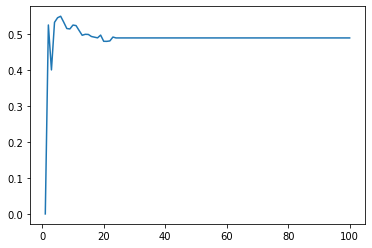

In [24]:
plt.plot(np.arange(1, 101, 1), f1_scores)
plt.show()

In [25]:
f1_scores = np.array(f1_scores)
max_idx = np.where(f1_scores == f1_scores.max())
print('Optimal max_depth = %d' %(max_idx[0]+1))

Optimal max_depth = 6


즉, 최대 깊이는 6이 된다.

### 최대 깊이 6으로 한 상태에서 의사결정나무를 그림으로 표현하고, 해석해 보겠다.

In [26]:
tree_clf = DecisionTreeClassifier(random_state=123, max_depth = 6)
tree_clf.fit(x_train, y_train)
export_graphviz(
        tree_clf,
        out_file = "tree_output.dot",
        feature_names= data4.iloc[:,:-1].columns,
        class_names= "Exited",
        rounded=True,
        filled=True,
        impurity = True,
)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

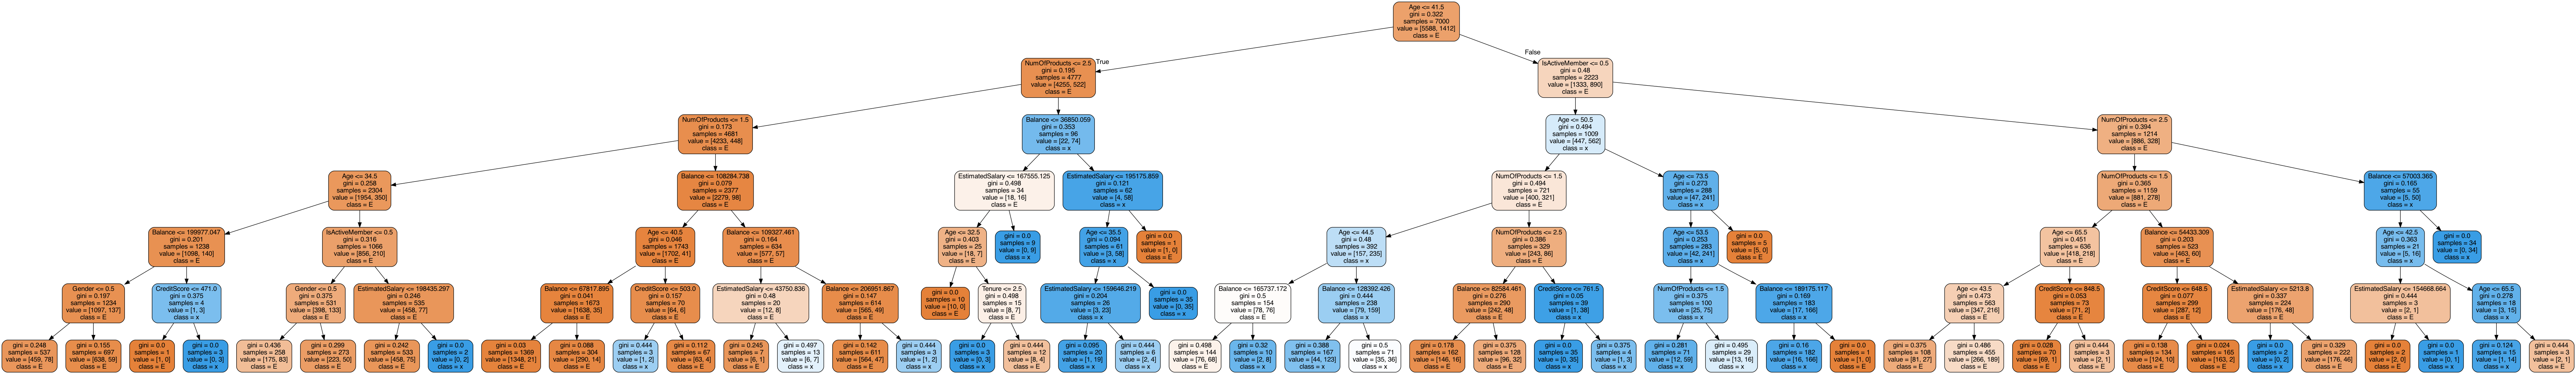

In [27]:
graph = pgv.AGraph("./tree_output.dot")
graph.draw('tree_output.png', prog='dot')
Image('tree_output.png')

생각보다 그림이 큰데, 작은 화면에 표현하려다 보니 잘 보이지 않는다. 내가 이를 해석한 바는 다음과 같다.
- 먼저 depth1에서, 나이가 41.5세 이상인지 아닌지에 따라 나누었다. 그림의 색깔로만 봐도, 41.5세 이하는 경제활동을 하지 않는 경우거나, 사회 초년생 및 돈이 많이 모이지 않은 사람들이 많기 때문에 Exit여부가 0인 경우가 많다. 하지만, 다음 분류가 또 필요해 보인다.
- depth 2에서는 왼쪽은 NumOfProducts, 오른쪽은 IsActiveMember로 나누었다. 나이가 41.5세 이하이고, NumOfProducts가 2.5 이하인 사람은 Exit이 True인 사람이 많았고, 2.5 이상인 사람은 False인 사람이 많았다. 반대로, 나이게 41.5세 이상이고, 수동적인 사람이라면, Exit할 확률이 많았다.
- 더 깊게 해석할 수 있겠지만, 간단히 해석하면 위와 같다.

### (3) 특징변수별 중요도

의사결정나무모형이 잘라주는 순서를 보았을 때, 중요한 변수 순서 3순위는 다음과 같다.
1. Age
2. NumOfProducts
3. IsActiveMember